In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, f_oneway
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Here are the imported and digitized data:

In [35]:
data = pd.read_csv("diabetes_prediction_dataset.csv")
data = pd.get_dummies(data, columns=["gender"], drop_first=False, dtype = int)
data["smoking_history"] = data["smoking_history"].replace({"No Info": 0, "never": 1, "current": 2, "former": 3, "ever": 4, "not current": 5})
data = data.drop_duplicates()
data

/tmp/ipykernel_4482/4235007515.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["smoking_history"] = data["smoking_history"].replace({"No Info": 0, "never": 1, "current": 2, "former": 3, "ever": 4, "not current": 5})


,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other
0,80.0,0,1,1,25.19,6.6,140,0,1,0,0
1,54.0,0,0,0,27.32,6.6,80,0,1,0,0
2,28.0,0,0,1,27.32,5.7,158,0,0,1,0
3,36.0,0,0,2,23.45,5.0,155,0,1,0,0
4,76.0,1,1,2,20.14,4.8,155,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
99994,36.0,0,0,0,24.60,4.8,145,0,1,0,0
99996,2.0,0,0,0,17.37,6.5,100,0,1,0,0
99997,66.0,0,0,3,27.83,5.7,155,0,0,1,0
99998,24.0,0,0,1,35.42,4.0,100,0,1,0,0


## My tasks

### 1. General Understanding of Data (Summary Statistics)

### 2. Correlation and Relationships (Feature Correlation)

### 3. Feature Typing and Categorization

### 4. Multicollinearity Analysis

## 1. General Understanding of Data

### Statistics: Mean, median, standard deviation, minimum, and maximum values.

In [36]:
print("Summary Statistics:\n")

data.describe()

Summary Statistics:



,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,1.336675,27.321461,5.532609,138.218231,0.088220,0.584122,0.415691,0.000187
std,22.462948,0.267544,0.197833,1.464599,6.767716,1.073232,40.909771,0.283616,0.492875,0.492843,0.013681
min,0.080000,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,0.000000,0.000000,1.000000,27.320000,5.800000,140.000000,0.000000,1.000000,0.000000,0.000000
75%,59.000000,0.000000,0.000000,2.000000,29.860000,6.200000,159.000000,0.000000,1.000000,1.000000,0.000000
max,80.000000,1.000000,1.000000,5.000000,95.690000,9.000000,300.000000,1.000000,1.000000,1.000000,1.000000


### Data distribution.

#### Distribution of Age

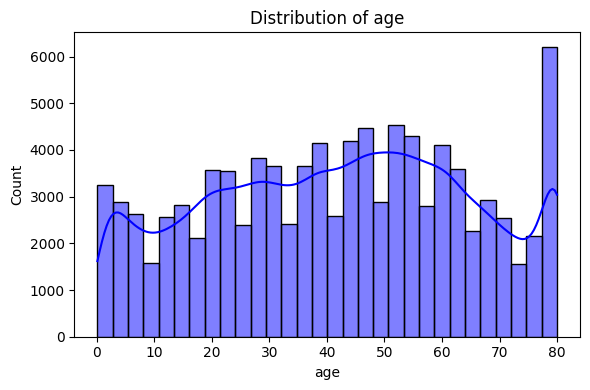

In [37]:
plt.figure(figsize=(6, 4))
sns.histplot(data["age"], kde=True, bins=30, color='blue')
plt.title("Distribution of age")
plt.tight_layout()
plt.show()

Shows a roughly normal distribution with multiple peaks

Main concentration between ages 40-60

Notable spike around age 80

Fairly wide spread from 0-80 years, indicating diverse age representation

#### Distribution of BMI

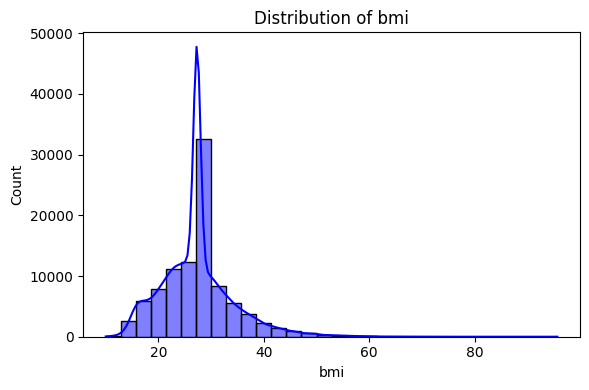

In [38]:
plt.figure(figsize=(6, 4))
sns.histplot(data["bmi"], kde=True, bins=30, color='blue')
plt.title("Distribution of bmi")
plt.tight_layout()
plt.show()

Right-skewed distribution

Peak around BMI 25-30

Most values fall between 20-40

Some extreme outliers extending up to 80

The distribution suggests many participants are in the overweight range (BMI > 25)

#### Distribution of Hemoglobin level

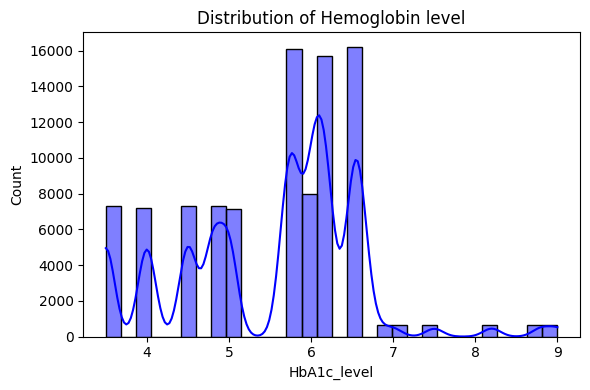

In [39]:
plt.figure(figsize=(6, 4))
sns.histplot(data["HbA1c_level"], kde=True, bins=30, color='blue')
plt.title("Distribution of Hemoglobin level")
plt.tight_layout()
plt.show()

Multimodal distribution with distinct peaks

Major peaks around 5.5-6.5%

Smaller peaks around 4% and 5%

Long right tail extending to 9%

Normal Hemoglobin is typically below 5.7%, prediabetes 5.7-6.4%, and diabetes >6.5%

#### Distribution of Blood Glucose

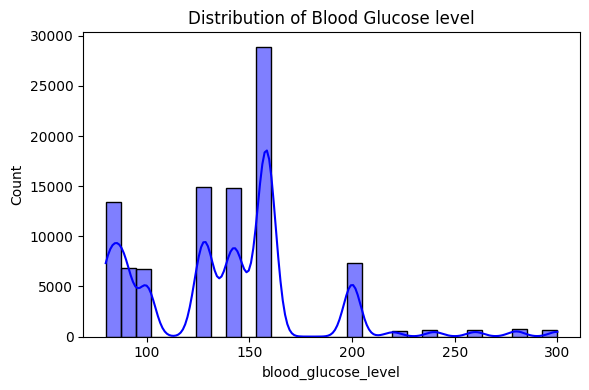

In [40]:
plt.figure(figsize=(6, 4))
sns.histplot(data["blood_glucose_level"], kde=True, bins=30, color='blue')
plt.title("Distribution of Blood Glucose level")
plt.tight_layout()
plt.show()

Multiple distinct peaks

Major peak around 150-160 mg/dL

Secondary peaks around 100 and 200 mg/dL

Long right tail extending to 300 mg/dL

Normal fasting glucose is typically 70-100 mg/dL, prediabetes 100-125 mg/dL, and diabetes >126 mg/dL

### Class distribution: Analyzing the balance of classes (whic is especially important for classification tasks).

/tmp/ipykernel_4482/755460904.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="diabetes", data=data, palette="viridis")


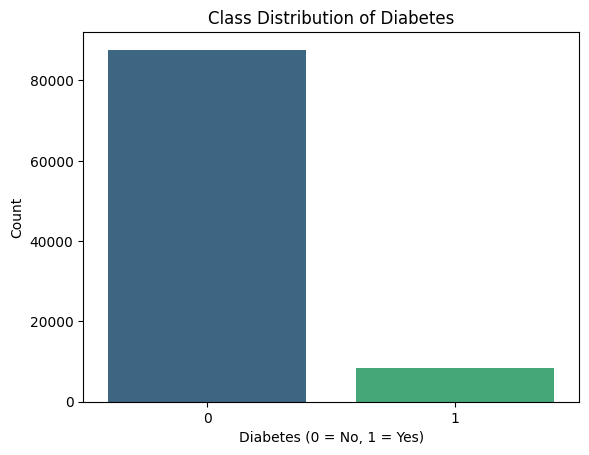

In [41]:
sns.countplot(x="diabetes", data=data, palette="viridis")
plt.title("Class Distribution of Diabetes")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

#### **Looking at the class distribution plot for diabetes, we can observe a clear class imbalance in the dataset:**

**Class Distribution Analysis:**


Class 0 (No Diabetes): Approximately 85,000 samples
Class 1 (Has Diabetes): Approximately 10,000 samples
The ratio is roughly 8.5:1 (no diabetes : diabetes)

This significant class imbalance is important to address because:

**Model Training Implications:**


Models may be biased towards predicting the majority class (no diabetes)
Could lead to poor performance in identifying diabetic patients
Standard accuracy metrics would be misleading

#### **Recommended Actions to Handle Imbalance:**

**Use resampling techniques:**

Oversampling the minority class (SMOTE, ADASYN)
Undersampling the majority class
Combination of both (SMOTEENN, SMOTETomek)


**Apply class weights during model training
Use appropriate evaluation metrics:**

F1-score
Precision-Recall curves
ROC-AUC
Balanced accuracy
Sensitivity/Specificity

#### **Business Impact:**

In medical diagnosis, missing a positive case (false negative) can be more costly than a false positive
Need to ensure the model can effectively identify diabetic cases despite being underrepresented

## 2. Correlation and Relationships (Feature Correlation)

### Computeing the correlation matrix

**Which helps identify linear relationships between features.**

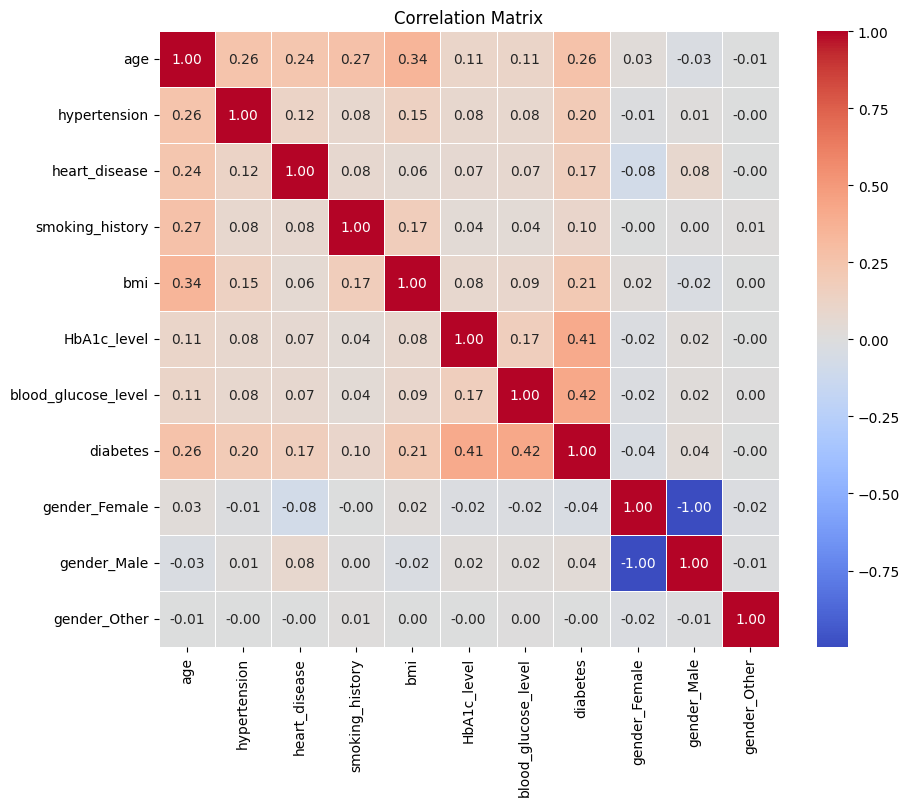

In [42]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

#### **Looking at the correlation matrix, here are the key insights about relationships between variables:**

**Strongest Correlations with Diabetes (Target Variable):**

Blood Glucose Level (0.42): Moderate positive correlation

HbA1c Level (0.41): Moderate positive correlation

Age (0.26): Weak positive correlation

BMI (0.21): Weak positive correlation

Hypertension (0.20): Weak positive correlation

#### **Other Notable Relationships:**

**Age shows several weak to moderate correlations:**

BMI (0.34)
Hypertension (0.26)
Heart Disease (0.24)
Smoking History (0.27)

**Gender variables:**

Perfect negative correlation (-1.00) between gender_Female and gender_Male, which is expected as they are mutually exclusive

Very weak correlations with other variables (all < 0.1)

**Medical Indicators:**

HbA1c and Blood Glucose levels show moderate correlation (0.17) with each other

Hypertension and Heart Disease show weak correlation (0.12)

**Key Observations:**

No multicollinearity issues among predictors (except for gender dummy variables)

Medical measurements (HbA1c, Blood Glucose) are the strongest predictors of diabetes

Lifestyle factors (BMI) and demographic factors (age) have weaker but notable correlations

Gender appears to have minimal impact on diabetes prediction

**These insights suggest:**

Medical measurements should be prioritized in modeling

Multiple weak correlations suggest that combining features might be beneficial

**No need to remove features due to multicollinearity (except perhaps one gender category)**

### Feature-target relationships: 

**Analyze how individual features impact the target variable (dependency plots, correlation tests).**

/tmp/ipykernel_4482/2698414713.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_correlation.index, y=target_correlation.values, palette="viridis")


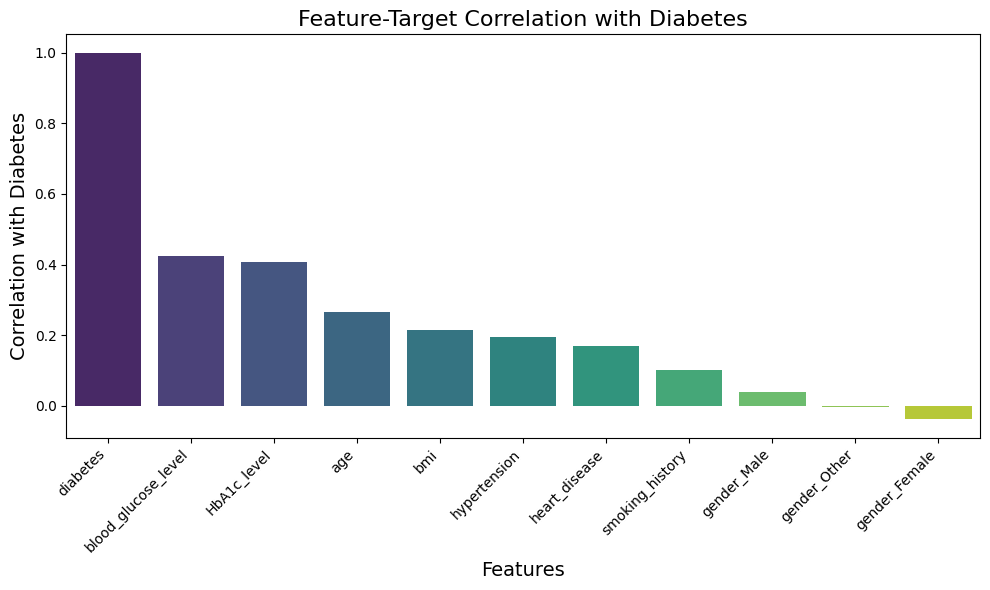

In [43]:
target_correlation = correlation_matrix["diabetes"].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=target_correlation.index, y=target_correlation.values, palette="viridis")
plt.title("Feature-Target Correlation with Diabetes", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Correlation with Diabetes", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Blood glucose level and HbA1c are the strongest predictors (correlation ~0.4)**

**Age, BMI, and hypertension form a second tier of predictors (correlation 0.2-0.3)**

**Heart disease and smoking history have weaker correlations (< 0.2)**

**Gender variables show minimal correlation with diabetes**

**This suggests a clear hierarchy of feature importance for modeling**

### Dependency plots:

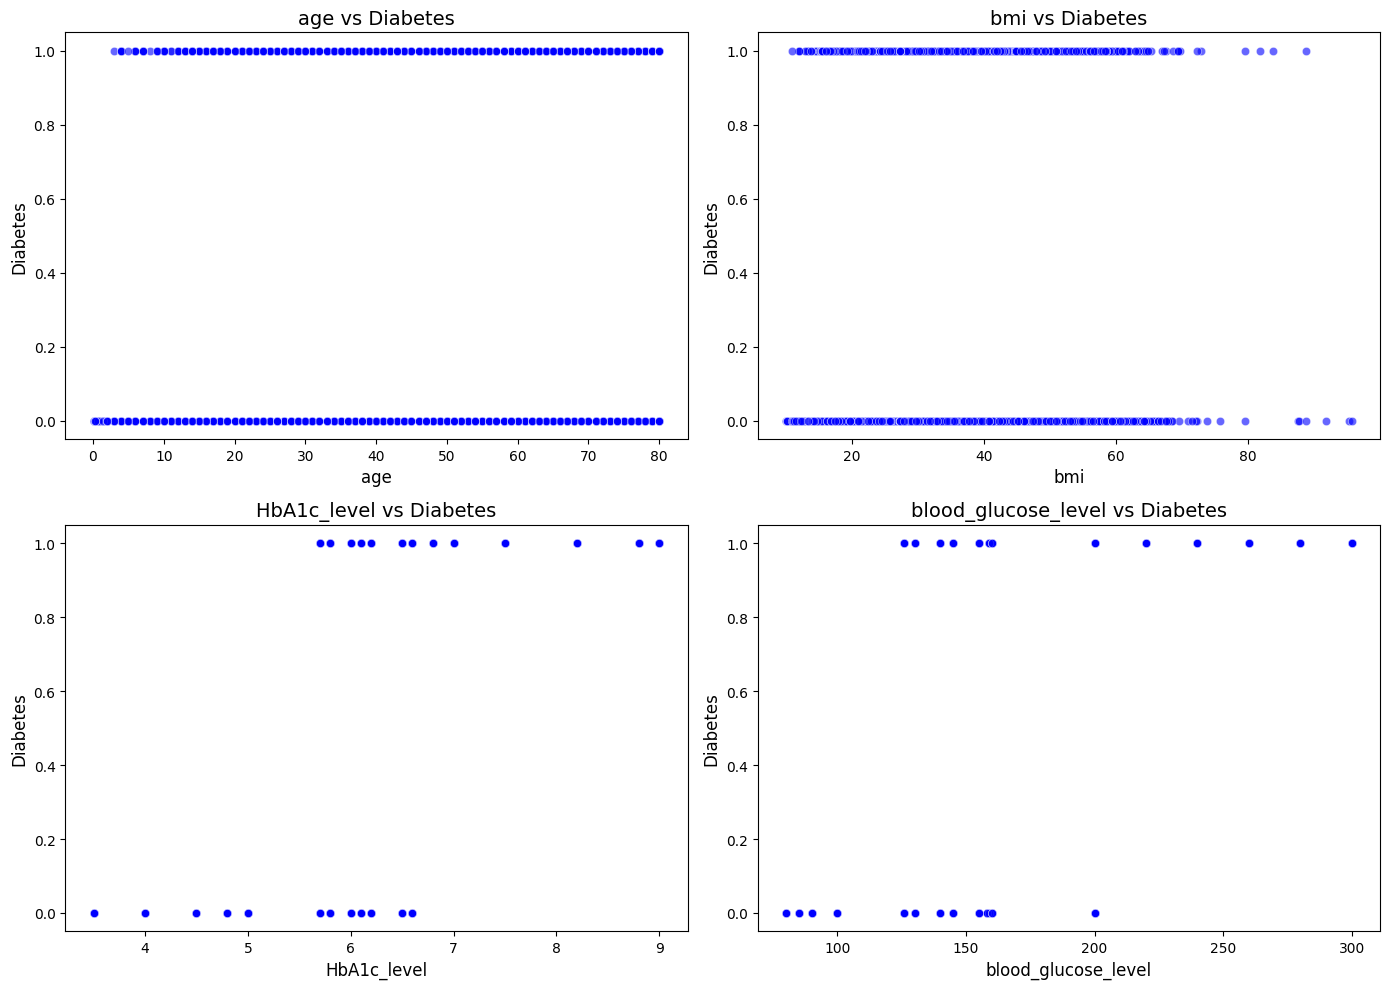

In [44]:
numerical_features = ["age", "bmi", "HbA1c_level", "blood_glucose_level"]

plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=data[feature], y=data["diabetes"], alpha=0.6, color='blue')
    plt.title(f"{feature} vs Diabetes", fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Diabetes", fontsize=12)
plt.tight_layout()
plt.show()

**Age vs Diabetes: Shows a binary pattern with no clear age threshold for diabetes onset**

**BMI vs Diabetes: Slightly more diabetes cases at higher BMI values, but significant overlap**

**HbA1c_level vs Diabetes: Clear separation pattern around 6.0, suggesting a diagnostic threshold**

**Blood_glucose_level vs Diabetes: Strong separation at higher values, particularly above 200**

**These plots reveal non-linear relationships and potential threshold effects**

/tmp/ipykernel_4482/229357887.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="gender", y="diabetes", data=gender_diabetes_means, palette="Set2")


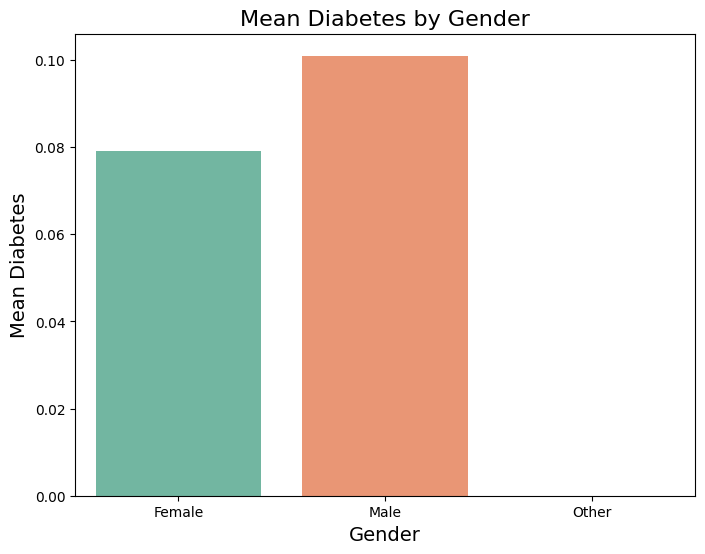

In [45]:
gender_columns = ["gender_Female", "gender_Male", "gender_Other"]
gender_diabetes_means = data.groupby(gender_columns)["diabetes"].mean().reset_index()
\
gender_diabetes_means = gender_diabetes_means.melt(id_vars="diabetes", var_name="gender", value_name="is_gender")
\
gender_diabetes_means = gender_diabetes_means[gender_diabetes_means["is_gender"] == 1]
\
plt.figure(figsize=(8, 6))
sns.barplot(x="gender", y="diabetes", data=gender_diabetes_means, palette="Set2")
plt.title("Mean Diabetes by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Mean Diabetes", fontsize=14)
plt.xticks(ticks=[0, 1, 2], labels=["Female", "Male", "Other"])
plt.show()

**Males show higher diabetes prevalence (~10%) compared to females (~8%)**

**The difference is relatively small but noticeable**

**"Other" gender category shows no visible diabetes cases**

**Suggests gender might be a minor but relevant factor in diabetes risk**

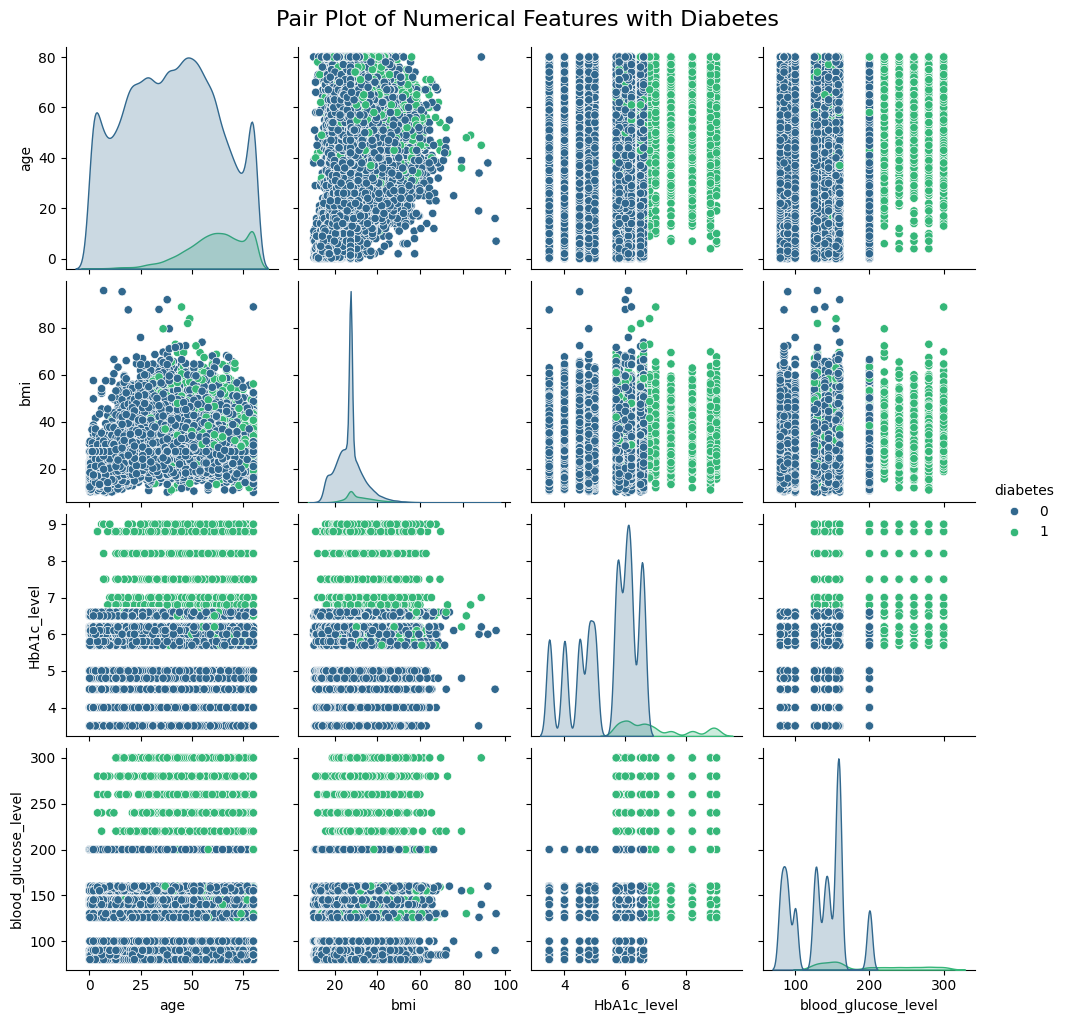

In [46]:
sns.pairplot(data[numerical_features + ["diabetes"]], hue="diabetes", palette="viridis")
plt.suptitle("Pair Plot of Numerical Features with Diabetes", y=1.02, fontsize=16)
plt.show()

**Shows complex interactions between variables**

**Density plots (diagonal) reveal distribution shapes for each variable**

**Clear clustering patterns in HbA1c and blood glucose measurements**

**Age and BMI show more continuous distributions**

**Green (diabetes) vs blue (no diabetes) points show separation patterns most clearly in medical measurements**

**Reveals potential feature interactions that could be important for modeling**

### For categorical features: use methods like ANOVA or Chi-squared tests.

**ANOVA**

In [47]:
categorical_features = ["smoking_history", "gender_Female", "gender_Male", "gender_Other"]

print("ANOVA Test Results:\n")
for feature in categorical_features:
    groups = [data[data["diabetes"] == value][feature] for value in data["diabetes"].unique()]
    f_stat, p_value = f_oneway(*groups)
    print(f"Feature: {feature}, F-Statistic: {f_stat:.4f}, P-Value: {p_value:.4e}")

ANOVA Test Results:

Feature: smoking_history, F-Statistic: 975.8791, P-Value: 3.6963e-213
Feature: gender_Female, F-Statistic: 137.2982, P-Value: 1.0905e-31
Feature: gender_Male, F-Statistic: 138.1779, P-Value: 7.0069e-32
Feature: gender_Other, F-Statistic: 1.7419, P-Value: 1.8690e-01


**Smoking History:**


Extremely low p-value (3.6963e-213) and high F-statistic (975.8791)
Indicates very strong evidence that smoking history categories have significantly different mean diabetes rates
Strongest relationship among all tested variables


**Gender Variables:**


Female and Male categories show similar strength of relationship:

Female: p-value = 1.0905e-31, F-statistic = 137.2982
Male: p-value = 7.0069e-32, F-statistic = 138.1779


Both are highly significant (p < 0.05)
Other gender: Not statistically significant (p = 0.1869 > 0.05)

**Chi-squared test for categorical features**

In [48]:
print("\nChi-Squared Test Results:\n")
for feature in categorical_features:
    contingency_table = pd.crosstab(data[feature], data["diabetes"])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f"Feature: {feature}, Chi-Squared: {chi2:.4f}, P-Value: {p:.4e}, Degrees of Freedom: {dof}")


Chi-Squared Test Results:

Feature: smoking_history, Chi-Squared: 1728.3186, P-Value: 0.0000e+00, Degrees of Freedom: 5
Feature: gender_Female, Chi-Squared: 136.8353, P-Value: 1.3101e-31, Degrees of Freedom: 1
Feature: gender_Male, Chi-Squared: 137.7116, P-Value: 8.4267e-32, Degrees of Freedom: 1
Feature: gender_Other, Chi-Squared: 0.8177, P-Value: 3.6586e-01, Degrees of Freedom: 1


**Smoking History:**


Highest chi-squared value (1728.3186)
P-value effectively zero
5 degrees of freedom indicating 6 smoking history categories
Strong evidence of association between smoking history and diabetes


**Gender Variables:**


Female: Chi-squared = 136.8353, p-value = 1.3101e-31
Male: Chi-squared = 137.7116, p-value = 8.4267e-32
Both show strong association with diabetes
Other: Not significant (p = 0.3658 > 0.05)

#### **Overall Conclusions**

Smoking history has the strongest statistical relationship with diabetes among categorical variables

Gender (Male/Female) shows significant but weaker association than smoking

"Other" gender category shows no significant relationship with diabetes in both tests

All significant relationships are extremely strong (very low p-values)

Results suggest these categorical variables (except "Other" gender) should be included in predictive modeling

## 3. Feature Typing and Categorization

#### Categorizing features

In [49]:
numerical_features = ["age", "bmi", "HbA1c_level", "blood_glucose_level"]
categorical_features = ["smoking_history", "gender_Female", "gender_Male", "gender_Other"]
target_feature = "diabetes"

print("Numerical Features:", numerical_features)
print("\nCategorical Features:", categorical_features)
print("\nTarget Feature:", target_feature)

Numerical Features: ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

Categorical Features: ['smoking_history', 'gender_Female', 'gender_Male', 'gender_Other']

Target Feature: diabetes


- **Numerical Features**: These are continuous variables that can take any value within a range. Examples include age, BMI, HbA1c level, and blood glucose level.
- **Categorical Features**: These are discrete variables that represent categories. Examples include smoking history and gender (encoded as one-hot variables: Female, Male, Other).
- **Target Feature**: This is the variable we aim to predict or analyze. In this case, it is `diabetes`, which indicates whether a patient has diabetes (1) or not (0).

#### Analyzing how the feature type influences model selection and preprocessing requirements

**Influence of Feature Type on Model Selection and Preprocessing:**

Numerical Features:

Suitable for models that require numerical inputs (e.g., regression, SVM, neural networks)

Require scaling (e.g., standardization or normalization) to ensure all features contribute equally)


**Categorical Features:**

Require encoding techniques (e.g., one-hot encoding for nominal, ordinal encoding for ordered categories)

Gender is already one-hot encoded; smoking history uses ordinal encoding

Useful for tree-based models (e.g., decision trees, random forests, XGBoost) without extensive preprocessing)


**Target Feature:**

Binary classification target (diabetes: 0 or 1)

ompatible with models designed for binary classification (e.g., logistic regression, decision trees, neural networks)


**Model Selection Recommendations:**

Logistic Regression: Requires scaled numerical features; categorical features need encoding

Decision Trees/Random Forests: Handles categorical features without extensive preprocessing

Gradient Boosting (e.g., XGBoost, LightGBM): Robust to mixed feature types, but benefits from encoding

Neural Networks: Requires normalized numerical features and encoded categorical features

## 4. Multicollinearity Analysis

In [50]:
# Compute Variance Inflation Factor (VIF) for numerical features
def compute_vif(df, features):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(df[features].values, i) for i in range(len(features))]
    return vif_data

print("\nMulticollinearity Analysis:")

# Calculate VIF for numerical features
vif_results = compute_vif(data, numerical_features)
print(vif_results)

# Identify features with high VIF
high_vif_features = vif_results[vif_results["VIF"] > 5]
if not high_vif_features.empty:
    print("\nFeatures with high multicollinearity (VIF > 5):")
    print(high_vif_features)
else:
    print("\nNo features with high multicollinearity detected.")



Multicollinearity Analysis:
               Feature        VIF
0                  age   5.127808
1                  bmi  15.166710
2          HbA1c_level  16.606793
3  blood_glucose_level  11.513531

Features with high multicollinearity (VIF > 5):
               Feature        VIF
0                  age   5.127808
1                  bmi  15.166710
2          HbA1c_level  16.606793
3  blood_glucose_level  11.513531


#### Multicollinearity Analysis: Conclusion

#### Key Observations:
1. **High VIF Values:**
   - Four features have high Variance Inflation Factor (VIF) values exceeding the threshold of 5, indicating significant multicollinearity:
     - **age**: 5.13
     - **bmi**: 15.17
     - **HbA1c_level**: 16.61
     - **blood_glucose_level**: 11.51

2. **Implications of High Multicollinearity:**
   - High VIF values suggest strong correlations among these features, leading to redundancy in the dataset.
   - Multicollinearity can impact model performance:
     - **Linear regression** models may suffer from inflated standard errors, making coefficient interpretation challenging.
     - **Tree-based models** (e.g., Random Forest, XGBoost) are less sensitive to multicollinearity and may not require immediate action.

---

#### Recommendations:
1. **Feature Selection or Engineering:**
   - Remove or combine features with high multicollinearity:
     - Use **Principal Component Analysis (PCA)** to combine correlated features into principal components.
     - Retain features most relevant to the target variable (e.g., based on correlation with `diabetes`).

2. **Model-Specific Strategies:**
   - For models like **logistic regression** or **linear regression**, drop one of the highly correlated features (e.g., `HbA1c_level` or `bmi`) to mitigate multicollinearity.
   - For tree-based models (e.g., **Random Forest**), multicollinearity is less of a concern, so features can be left as is.

3. **Further Investigation:**
   - Assess domain-specific importance of these features:
     - **HbA1c_level** and **blood_glucose_level** are likely correlated due to their relationship with blood sugar control. Domain knowledge can guide which feature to prioritize.

4. **Future Steps:**
   - Perform feature importance analysis with your target model to identify significant features.
   - Test the model's performance with and without redundant features to evaluate the impact on accuracy.

---

By addressing multicollinearity, you can enhance model interpretability and reduce redundancy, improving overall performance and robustness.
